In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
from numpy.random import seed
seed(1)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [67]:
calhouse = pd.read_csv('flights200.csv')
calhouse.head()

,flightdate,airline,carrier,origin,orignum,destination,Unnamed: 6,deptime,depdetla,depdelay,...,arrdelta,arrdelayu,cancelled,cancelreason,distance,carrierdelay,weatherdelay,NASdelay,SecurityDelay,lateaircraftdelay
0,4/17/14,20409,B6,ABQ,1,JFK,NaN,4,5,5,...,2.0,2.0,0,NaN,1826,NaN,NaN,NaN,NaN,NaN
1,4/6/14,19977,UA,AGS,2,ATL,NaN,1,86,86,...,81.0,81.0,0,NaN,143,0.0,54.0,0.0,0.0,27.0
2,4/2/14,19977,UA,ANC,3,DEN,NaN,3,4,4,...,21.0,21.0,0,NaN,2405,0.0,0.0,21.0,0.0,0.0
3,4/1/14,19977,UA,ANC,3,DEN,NaN,4,5,5,...,-3.0,0.0,0,NaN,2405,NaN,NaN,NaN,NaN,NaN
4,4/10/14,19977,UA,ANC,3,DEN,NaN,4,5,5,...,-23.0,0.0,0,NaN,2405,NaN,NaN,NaN,NaN,NaN


In [68]:
X = calhouse[["orignum", "deptime"]]
y = calhouse["cancelled"]

In [69]:
X.shape

(201, 2)

In [70]:
y.shape

(201,)

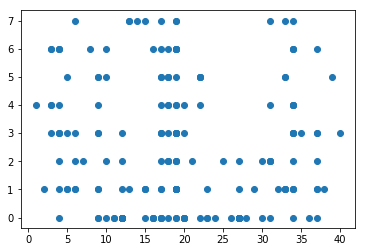

In [71]:
# Visualize Data
X1=X.values
#y=y.values

plt.scatter(X1[:, 0], X1[:, 1])

In [72]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [73]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [74]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [75]:
y_train.shape

(150,)

In [76]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical.shape

(150, 2)

In [77]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 14        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
X_train_scaled.shape


(150, 2)

In [81]:
X_train_scaled


array([[ 1.70546635,  0.18701609],
       [-0.30886399,  0.18701609],
       [ 1.4033168 , -0.70353672],
       [-0.81244657, -1.14881312],
       [-1.11459612,  1.0775689 ],
       [ 1.4033168 ,  0.63229249],
       [ 1.10116725, -0.25826031],
       [ 1.30260029, -0.70353672],
       [ 2.0076159 ,  0.18701609],
       [ 1.4033168 ,  1.5228453 ],
       [-0.30886399, -0.70353672],
       [-0.20814747,  1.0775689 ],
       [ 0.69830118, -1.14881312],
       [-0.91316309, -1.14881312],
       [-1.51746219, -0.70353672],
       [-1.71889522,  1.5228453 ],
       [ 1.4033168 ,  1.5228453 ],
       [-0.10743095, -0.70353672],
       [-0.81244657, -1.14881312],
       [-0.4095805 , -1.14881312],
       [-0.10743095,  0.18701609],
       [-0.71173005, -0.70353672],
       [ 1.4033168 ,  0.18701609],
       [-0.10743095,  0.18701609],
       [-0.10743095,  1.96812171],
       [ 1.30260029, -0.70353672],
       [-0.10743095,  1.5228453 ],
       [-1.61817871,  0.63229249],
       [-0.10743095,

In [82]:
y_train.shape#_categorical.shape


(150,)

In [83]:
y_train#_categorical


195    0
73     0
173    0
53     1
33     0
180    0
158    0
168    0
200    0
184    0
69     0
90     0
150    1
42     1
17     0
5      0
185    0
99     0
48     1
66     1
107    0
54     0
177    0
106    0
119    0
167    0
116    0
12     0
120    1
95     0
      ..
22     0
61     0
63     0
7      0
197    1
141    1
86     0
96     0
68     0
50     1
142    0
157    0
156    1
139    1
146    1
101    0
20     0
178    0
25     0
134    0
71     0
129    0
144    1
192    0
79     1
133    0
137    1
72     0
140    0
37     0
Name: cancelled, Length: 150, dtype: int64

In [85]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 0.5990 - acc: 0.7200
Epoch 2/100
 - 0s - loss: 0.5888 - acc: 0.7200
Epoch 3/100
 - 0s - loss: 0.5784 - acc: 0.7200
Epoch 4/100
 - 0s - loss: 0.5686 - acc: 0.7333
Epoch 5/100
 - 0s - loss: 0.5591 - acc: 0.7467
Epoch 6/100
 - 0s - loss: 0.5496 - acc: 0.7800
Epoch 7/100
 - 0s - loss: 0.5419 - acc: 0.7800
Epoch 8/100
 - 0s - loss: 0.5333 - acc: 0.7867
Epoch 9/100
 - 0s - loss: 0.5256 - acc: 0.7933
Epoch 10/100
 - 0s - loss: 0.5186 - acc: 0.8000
Epoch 11/100
 - 0s - loss: 0.5116 - acc: 0.8133
Epoch 12/100
 - 0s - loss: 0.5047 - acc: 0.8400
Epoch 13/100
 - 0s - loss: 0.4984 - acc: 0.8467
Epoch 14/100
 - 0s - loss: 0.4924 - acc: 0.8467
Epoch 15/100
 - 0s - loss: 0.4863 - acc: 0.8600
Epoch 16/100
 - 0s - loss: 0.4805 - acc: 0.8800
Epoch 17/100
 - 0s - loss: 0.4751 - acc: 0.8800
Epoch 18/100
 - 0s - loss: 0.4699 - acc: 0.8867
Epoch 19/100
 - 0s - loss: 0.4646 - acc: 0.8867
Epoch 20/100
 - 0s - loss: 0.4597 - acc: 0.8867
Epoch 21/100
 - 0s - loss: 0.4549 - acc: 0.8867
E

# Deep Learning
For this network, we simply add an additional hidden layer of 6 nodes

In [86]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=2))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [87]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 14        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [88]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 0.6519 - acc: 0.7000
Epoch 2/100
 - 0s - loss: 0.6339 - acc: 0.6933
Epoch 3/100
 - 0s - loss: 0.6177 - acc: 0.6533
Epoch 4/100
 - 0s - loss: 0.6017 - acc: 0.6533
Epoch 5/100
 - 0s - loss: 0.5882 - acc: 0.6600
Epoch 6/100
 - 0s - loss: 0.5743 - acc: 0.6667
Epoch 7/100
 - 0s - loss: 0.5616 - acc: 0.6733
Epoch 8/100
 - 0s - loss: 0.5498 - acc: 0.6800
Epoch 9/100
 - 0s - loss: 0.5382 - acc: 0.6800
Epoch 10/100
 - 0s - loss: 0.5274 - acc: 0.6600
Epoch 11/100
 - 0s - loss: 0.5172 - acc: 0.6600
Epoch 12/100
 - 0s - loss: 0.5079 - acc: 0.6600
Epoch 13/100
 - 0s - loss: 0.4983 - acc: 0.6600
Epoch 14/100
 - 0s - loss: 0.4898 - acc: 0.6733
Epoch 15/100
 - 0s - loss: 0.4817 - acc: 0.6733
Epoch 16/100
 - 0s - loss: 0.4740 - acc: 0.6667
Epoch 17/100
 - 0s - loss: 0.4671 - acc: 0.6733
Epoch 18/100
 - 0s - loss: 0.4592 - acc: 0.6867
Epoch 19/100
 - 0s - loss: 0.4530 - acc: 0.6867
Epoch 20/100
 - 0s - loss: 0.4461 - acc: 0.6933
Epoch 21/100
 - 0s - loss: 0.4397 - acc: 0.6933
E

# Compare the models below

In [89]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.28600505929367215, Accuracy: 0.9019607784701329


In [90]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 0.24825930829141654, Accuracy: 0.9215686356320101


# In a nutshell...

![stack more layers](../Images/stack-more-layers.jpg)